## Loading the packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
import seaborn as sns

%matplotlib inline

### Read the data from the CSV file 

In [2]:
df = pd.read_csv('loan_train.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
# Check the number of people that have paidoff the loan and the number that are in collection
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

## Visualizing the data 

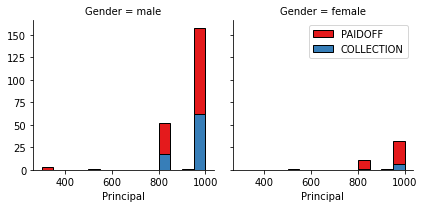

In [7]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 15)

# Take the categorical data and form facetgrid for the loan_status
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)

# Map the facetgrid formed above with Principal attribute
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

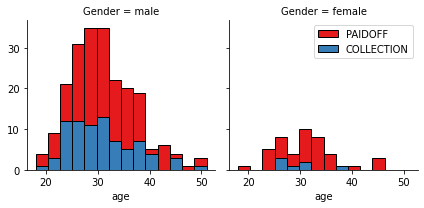

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 15)

# Take the categorical data and form facetgrid for the loan_status
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)

# Map the facetgrid formed above with Age attribute
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre Processing 

#### Convert the date and time to datetime format

In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#### Visualize the frequency of people taking loan on particular days  

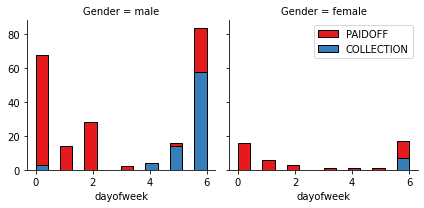

In [10]:
# Create a new coloumn indicating the day of the week 
df['dayofweek'] = df['effective_date'].dt.dayofweek

bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 15)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
# Add a new coloumn indicating the threshold value of the day of the week after which loan is generally not paid

# From the visualization done above we can see that after day 3 loan is not being paid off
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
# Get the percent of male and female that have paid the dues or are have not

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
# Male:->0 Female:->1

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


#### Group the loan status based on their education 

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
# Features upon which algorithm will be applied
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]

# Based on the categorical values in education values are converted into binary values and appended 
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)

Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
X = Feature
X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
y = df['loan_status'].values
y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Normalize the data 

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [20]:
X[:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# K-Nearest Neighbor (KNN) Algorithm 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [23]:
k = 15
KNN_accuracy_dict = dict()

for i in range(1,k+1):
    KNN_neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    KNN_yhat = KNN_neigh.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, KNN_yhat)
    KNN_accuracy_dict.update({i:accuracy})
    
print(KNN_accuracy_dict)
KNN_Max_accuracy_neighbors = max(KNN_accuracy_dict , key = KNN_accuracy_dict.get)
print("\nMaximum Accuracy is with neighbors -> ", KNN_Max_accuracy_neighbors)
print("Maximum Accuracy -> ", KNN_accuracy_dict[KNN_Max_accuracy_neighbors])

{1: 0.625, 2: 0.6153846153846154, 3: 0.7307692307692307, 4: 0.7019230769230769, 5: 0.7596153846153846, 6: 0.6826923076923077, 7: 0.7596153846153846, 8: 0.7211538461538461, 9: 0.7211538461538461, 10: 0.7019230769230769, 11: 0.7211538461538461, 12: 0.7019230769230769, 13: 0.75, 14: 0.7596153846153846, 15: 0.7403846153846154}

Maximum Accuracy is with neighbors ->  5
Maximum Accuracy ->  0.7596153846153846


In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

KNN_neigh = KNeighborsClassifier(n_neighbors = KNN_Max_accuracy_neighbors).fit(X_train, y_train)
KNN_yhat = KNN_neigh.predict(X_test)

KNN_F1_score = f1_score(y_test, KNN_yhat, average='weighted')
KNN_jaccard_similarity_score = jaccard_score(y_test, KNN_yhat, pos_label = "PAIDOFF")

print("K Nearest Neighbor F1-score :-> ", KNN_F1_score)
print("K Nearest Neighbor Jaccard Similarity Score :-> ", KNN_jaccard_similarity_score)

K Nearest Neighbor F1-score :->  0.7469401551270192
K Nearest Neighbor Jaccard Similarity Score :->  0.7311827956989247


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [26]:
loanDecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [27]:
DT_yhat = loanDecisionTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, DT_yhat))

DecisionTrees's Accuracy:  0.7115384615384616


In [28]:
DT_F1_score = f1_score(y_test, DT_yhat, average='weighted')
DT_jaccard_similarity_score = jaccard_score(y_test, DT_yhat, pos_label = "PAIDOFF")

print("Decision Tree F1-score :-> ", DT_F1_score)
print("Decision Tree Jaccard Similarity Score :-> ", DT_jaccard_similarity_score)

Decision Tree F1-score :->  0.615600691443388
Decision Tree Jaccard Similarity Score :->  0.7115384615384616


# Support Vector Machine

In [29]:
from sklearn import svm

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=43)
SVM_clf = svm.SVC(kernel='rbf')
SVM_clf.fit(X_train, y_train)

SVC()

In [31]:
SVM_yhat = SVM_clf.predict(X_test)

In [32]:
SVM_F1_score = f1_score(y_test, SVM_yhat, average='weighted')
SVM_jaccard_similarity_score = jaccard_score(y_test, SVM_yhat, pos_label = "PAIDOFF")

print("Decision Tree F1-score :-> ", SVM_F1_score)
print("Decision Tree Jaccard Similarity Score :-> ", SVM_jaccard_similarity_score)

Decision Tree F1-score :->  0.6299405014874628
Decision Tree Jaccard Similarity Score :->  0.7403846153846154


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=43)
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train, y_train)
LR_yhat = LR.predict(X_test)

In [35]:
LR_yhat_prob = LR.predict_proba(X_test)

In [36]:
from sklearn.metrics import log_loss

LR_F1_score = f1_score(y_test, LR_yhat, average='weighted')
LR_jaccard_similarity_score = jaccard_score(y_test, LR_yhat, pos_label = "PAIDOFF")
LR_log_loss = log_loss(y_test, LR_yhat_prob)

print("Logistic Regression F1-score :-> ", LR_F1_score)
print("Logistic Regression Jaccard Similarity Score :-> ", LR_jaccard_similarity_score)
print("Logistic Regression Log loss :-> ", LR_log_loss)

Logistic Regression F1-score :->  0.6299405014874628
Logistic Regression Jaccard Similarity Score :->  0.7403846153846154
Logistic Regression Log loss :->  0.5176677246830843


## Model Evaluation using Test set 

In [37]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [38]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace = ['male', 'female'], value=[0,1],inplace=True)

Feature_test_dataset = test_df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
Feature_test_dataset = pd.concat([Feature_test_dataset, pd.get_dummies(test_df['education'])], axis=1)
Feature_test_dataset.drop(['Master or Above'], axis = 1, inplace=True)

X_test_dataset = Feature_test_dataset
y_test_dataset = test_df['loan_status'].values

#Normalize test dataset
X_test_dataset = preprocessing.StandardScaler().fit(X_test_dataset).transform(X_test_dataset)

#### KNN on Loan Test Set 

In [39]:
knn_yhat_testDataset = KNN_neigh.predict(X_test_dataset)
KNN_test_F1_score = f1_score(y_test_dataset, knn_yhat_testDataset, average='weighted')
KNN_test_jaccard_similarity_score = jaccard_score(y_test_dataset, knn_yhat_testDataset, pos_label = "PAIDOFF")

print("K Nearest Neighbor test dataset F1-score :-> ", KNN_test_F1_score)
print("K Nearest Neighbor test dataset Jaccard Similarity Score :-> ", KNN_test_jaccard_similarity_score)

K Nearest Neighbor test dataset F1-score :->  0.6328400281888654
K Nearest Neighbor test dataset Jaccard Similarity Score :->  0.6538461538461539


#### Decision Tree on Loan Test Set 

In [40]:
DT_yhat_testDataset = loanDecisionTree.predict(X_test_dataset)
DT_test_F1_score = f1_score(y_test_dataset, DT_yhat_testDataset, average='weighted')
DT_test_jaccard_similarity_score = jaccard_score(y_test_dataset, DT_yhat_testDataset, pos_label = "PAIDOFF")

print("Decision Tree F1-score :-> ", DT_test_F1_score)
print("Decision Tree Jaccard Similarity Score :-> ", DT_test_jaccard_similarity_score)

Decision Tree F1-score :->  0.626541384672668
Decision Tree Jaccard Similarity Score :->  0.6792452830188679


#### SVM on Loan Test Set 

In [41]:
SVM_yhat_testDataset = SVM_clf.predict(X_test_dataset)
SVM_test_F1_score = f1_score(y_test_dataset, SVM_yhat_testDataset, average='weighted')
SVM_test_jaccard_similarity_score = jaccard_score(y_test_dataset, SVM_yhat_testDataset, pos_label = "PAIDOFF")

print("SVM Tree F1-score :-> ", SVM_test_F1_score)
print("SVM Tree Jaccard Similarity Score :-> ", SVM_test_jaccard_similarity_score)

SVM Tree F1-score :->  0.6212664277180406
SVM Tree Jaccard Similarity Score :->  0.7222222222222222


#### Logistic Regression on Loan Test Set 

In [42]:
LR_yhat_testDataset = LR.predict(X_test_dataset)
LR_test_yhat_prob = LR.predict_proba(X_test_dataset)

LR_test_F1_score = f1_score(y_test_dataset, LR_yhat_testDataset, average='weighted')
LR_test_jaccard_similarity_score = jaccard_score(y_test_dataset, LR_yhat_testDataset, pos_label = "PAIDOFF")
LR_test_log_loss = log_loss(y_test_dataset, LR_test_yhat_prob)

print("Logistic Regression F1-score :-> ", LR_test_F1_score)
print("Logistic Regression Jaccard Similarity Score :-> ", LR_test_jaccard_similarity_score)
print("Logistic Regression Log Loss :-> ", LR_test_log_loss)

Logistic Regression F1-score :->  0.6304176516942475
Logistic Regression Jaccard Similarity Score :->  0.7407407407407407
Logistic Regression Log Loss :->  0.5325904153249399


## Report of each algorithm 

In [43]:
jaccardScore_list = [KNN_test_jaccard_similarity_score, DT_test_jaccard_similarity_score,
                    SVM_test_jaccard_similarity_score, LR_test_jaccard_similarity_score]
f1Score_list = [KNN_test_F1_score, DT_test_F1_score, SVM_test_F1_score, LR_test_F1_score]
logLoss_list = ['NA', 'NA', 'NA', LR_test_log_loss]

report = pd.DataFrame({'Jaccard' : jaccardScore_list , 'F1-score' : f1Score_list , 'LogLoss' : logLoss_list},
                    index=['KNN' , 'Decision Tree' , 'SVM' , 'LogisticRegression'])
report.columns.name = 'Algorithm'
report

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.653846,0.632840,NA
Decision Tree,0.679245,0.626541,NA
SVM,0.722222,0.621266,NA
LogisticRegression,0.740741,0.630418,0.53259
